### Урок 2. ДЗ ###

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
def standard_scale(X):
    """стандартизация"""
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [4]:
def calc_mse(y, y_pred):
    """расчет MSE"""
    err = np.mean((y - y_pred)**2)
    return err

In [5]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    """градиентный спуск с L2 регуляризацией"""
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = 2 * reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
#             DEBUG
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
#     print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [6]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [7]:
n = 50
lambda_coef = np.logspace(-3, 2, n)
lambda_coef

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

In [8]:
W_list = np.zeros((n, X_st.shape[1]), dtype=np.float64)
for i in range(n):
    W_list[i, :] = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-3, reg=lambda_coef[i])

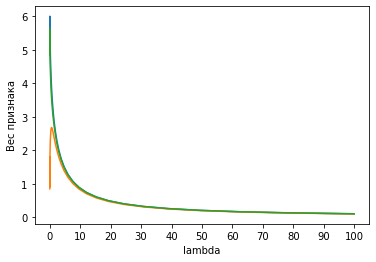

In [9]:
for i in range(X_st.shape[1]-1):
    plt.plot(lambda_coef, W_list[:, i+1])

plt.xticks(np.arange(0, 101, 10))
plt.xlabel('lambda')
plt.ylabel('Вес признака');

Вывод: при увеличении значения коэффициента регуляризации - значения весов снижаются.

<hr> 

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [10]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    """градиентный спуск с L1 регуляризацией"""
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
#             DEBUG
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
#     print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [11]:
W_list = np.zeros((n, X_st.shape[1]), dtype=np.float64)
for i in range(n):
    W_list[i, :] = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-3, reg=lambda_coef[i])

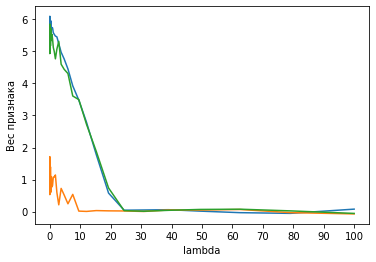

In [12]:
for i in range(X_st.shape[1]-1):
    plt.plot(lambda_coef, W_list[:, i+1])

plt.xticks(np.arange(0, 101, 10))
plt.xlabel('lambda')
plt.ylabel('Вес признака');

<hr>

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

<img src='./scale_1200.webp' width=50%>

In [13]:
# ОТВЕТ: Можно, если это необходимо. Лучше применять сначала стандартизацию, потом нормализацию.
# 

<hr>

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.


In [14]:
from sklearn.datasets import make_regression

In [15]:
X, y = make_regression(n_samples = 50_000, n_features=3, noise = 2)

In [16]:
X.shape

(50000, 3)

In [17]:
def gradient_descent_reg_l2_mse_log(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    mse_log = []
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        mse_log.append([i, err])
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
    return mse_log

In [18]:
def stohastic_gradient_descent_l2_mse_log(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    mse_log = []
        
    for i in range(0, iterations):
        
        inds = np.random.randint(n, size=X.shape[0])

        X_tmp = X[inds, ]
        y_tmp = np.array(y)[inds]


        y_pred_tmp = np.dot(X_tmp, W)
        dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации

        W -= eta * (dQ + dReg)   
    
        err = calc_mse(y, np.dot(X, W))
        mse_log.append([i, err])

    return mse_log

In [19]:
iterations = 2000
eta = 1e-3
reg = 0

gd_mse_log = np.array(gradient_descent_reg_l2_mse_log(X, y, iterations=iterations, eta=eta, reg=reg))
sgd_mse_log = np.array(stohastic_gradient_descent_l2_mse_log(X, y, iterations=iterations, eta=eta, reg=reg))

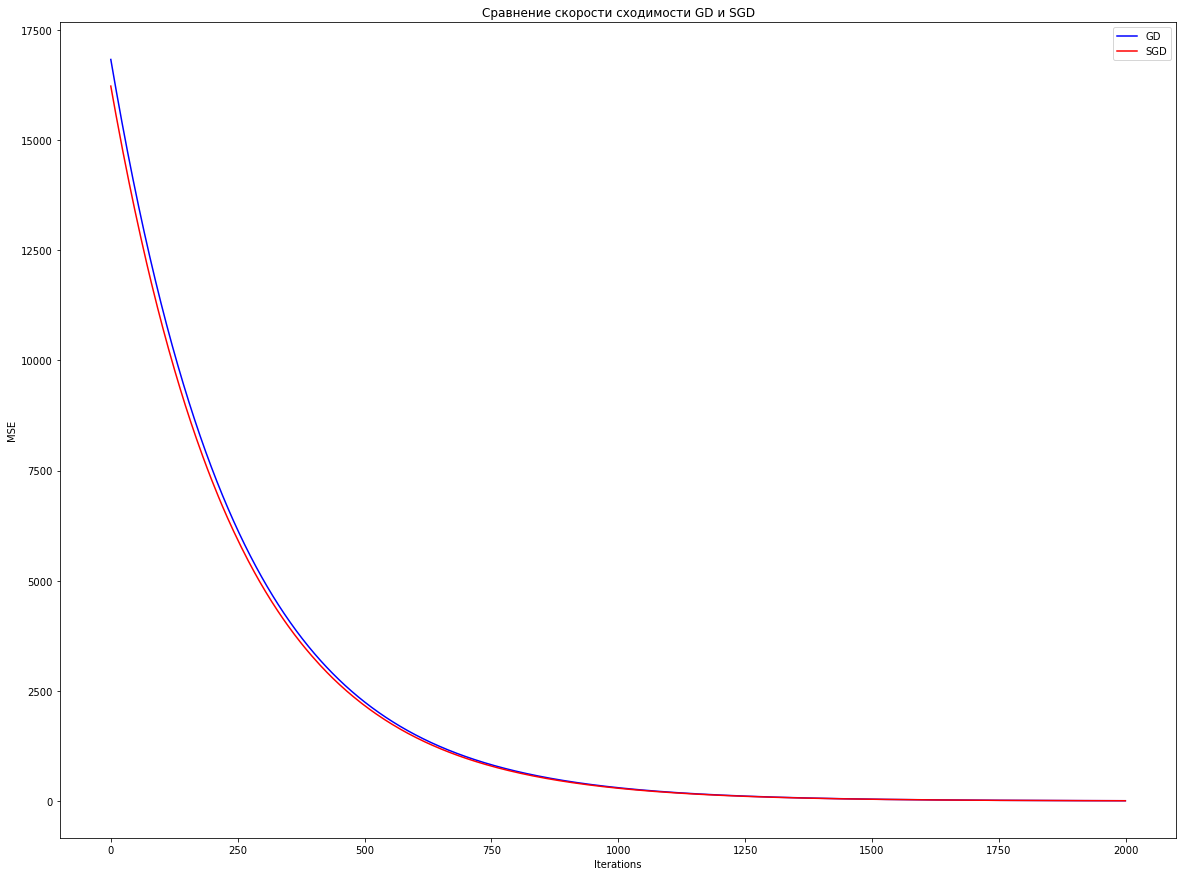

In [20]:
fig, ax = plt.subplots()
ax.plot(gd_mse_log[:,0], gd_mse_log[:,1], color='b', label = 'GD')
ax.plot(sgd_mse_log[:,0], sgd_mse_log [:,1], color='r', label = 'SGD')
ax.legend()
plt.title('Сравнение скорости сходимости GD и SGD')
plt.xlabel('Iterations')
plt.ylabel('MSE')
fig.set_figheight(15)
fig.set_figwidth(20)
plt.show()

In [21]:
# ВЫВОД: исходя из графика можно сделать вывод, что ошибка при SGD и GD приходит к 
# минимальному значению практически одинаково. Но стоит заметить, что при использовании градиентного спуска
# минимальное значение ошибки достигается быстрее, чем при стохастическом.